In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [4]:
data=pd.read_csv("TSLA.CSV")

In [5]:
# Univariate analysis
stock_data=data[["Date","Close"]]

In [6]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9860\3739671253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
stock_data=stock_data.set_index("Date")

In [11]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [ ]:

why we convert this column into index

1.retriving of the data will be easy
2.vusulization will be easy
3.whatever library we are using for the time serise like statsmodel scipy so these library


# EDA of the data

In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [13]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


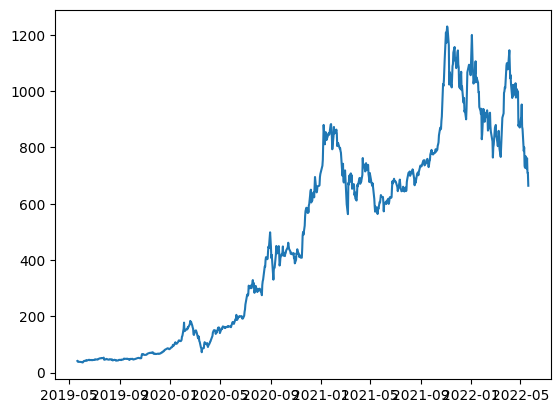

In [14]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

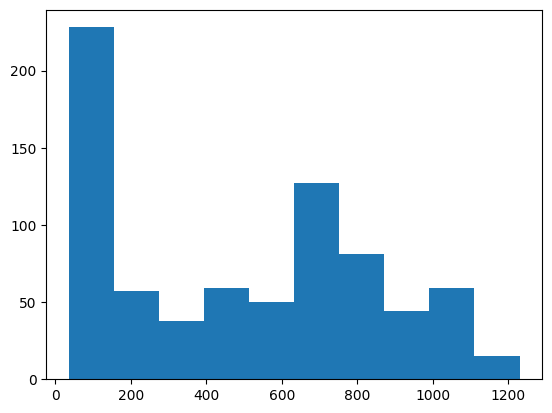

In [15]:
plt.hist(stock_data.Close)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9860\1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<Axes: xlabel='Close', ylabel='Density'>

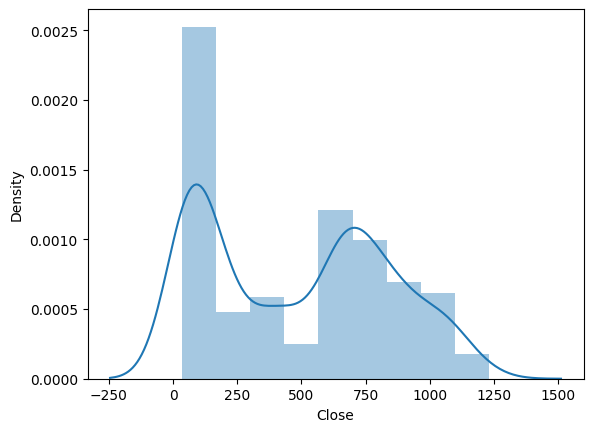

In [16]:
import seaborn as sns
sns.distplot(stock_data.Close)

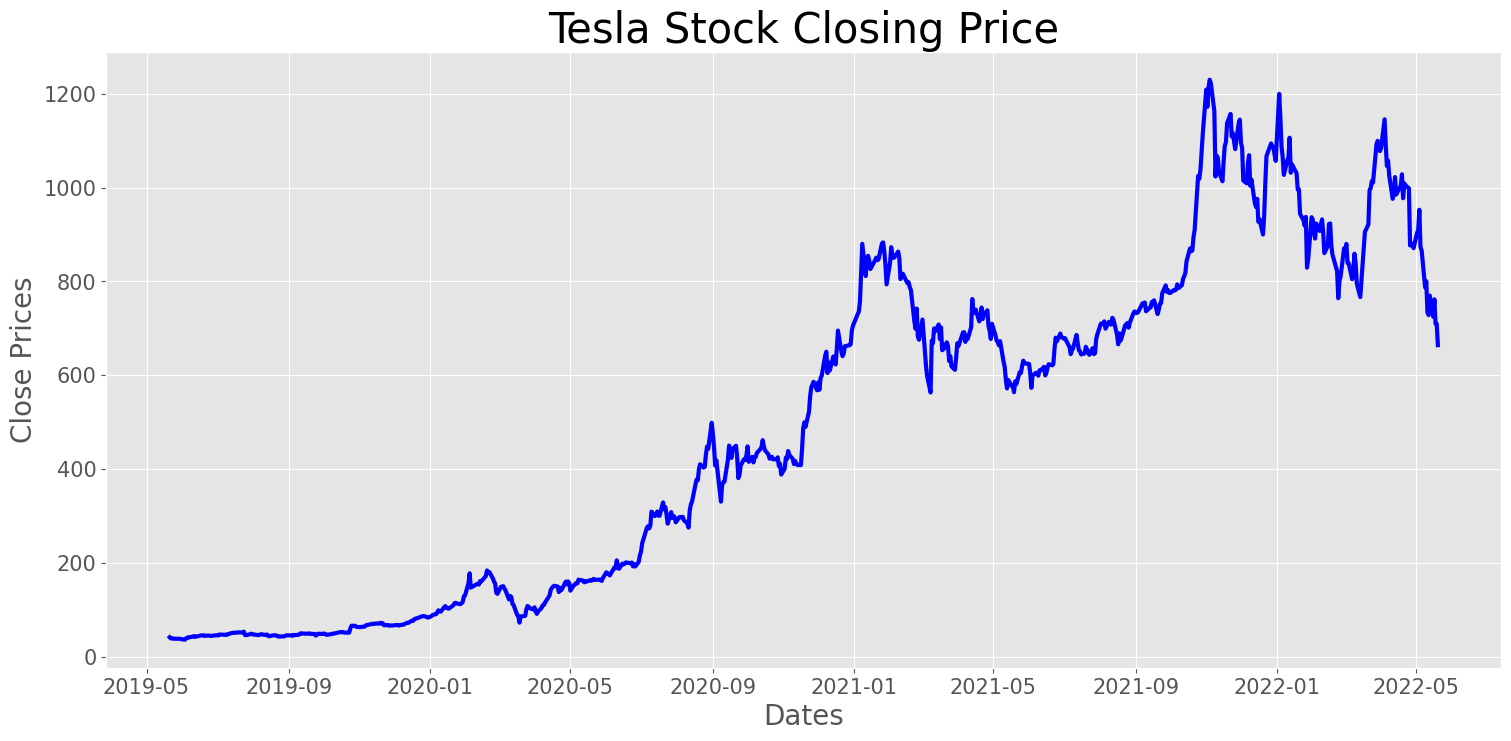

In [17]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

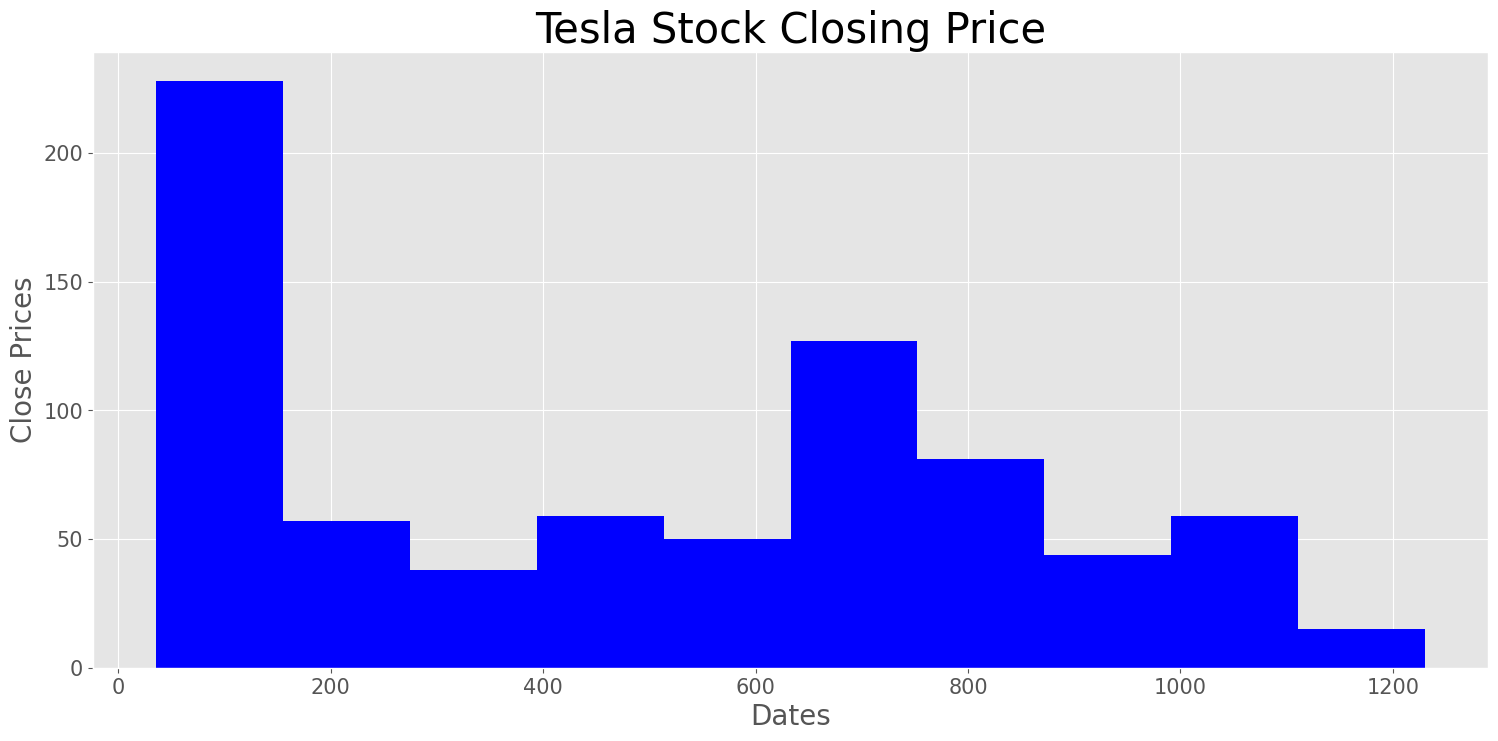

In [18]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

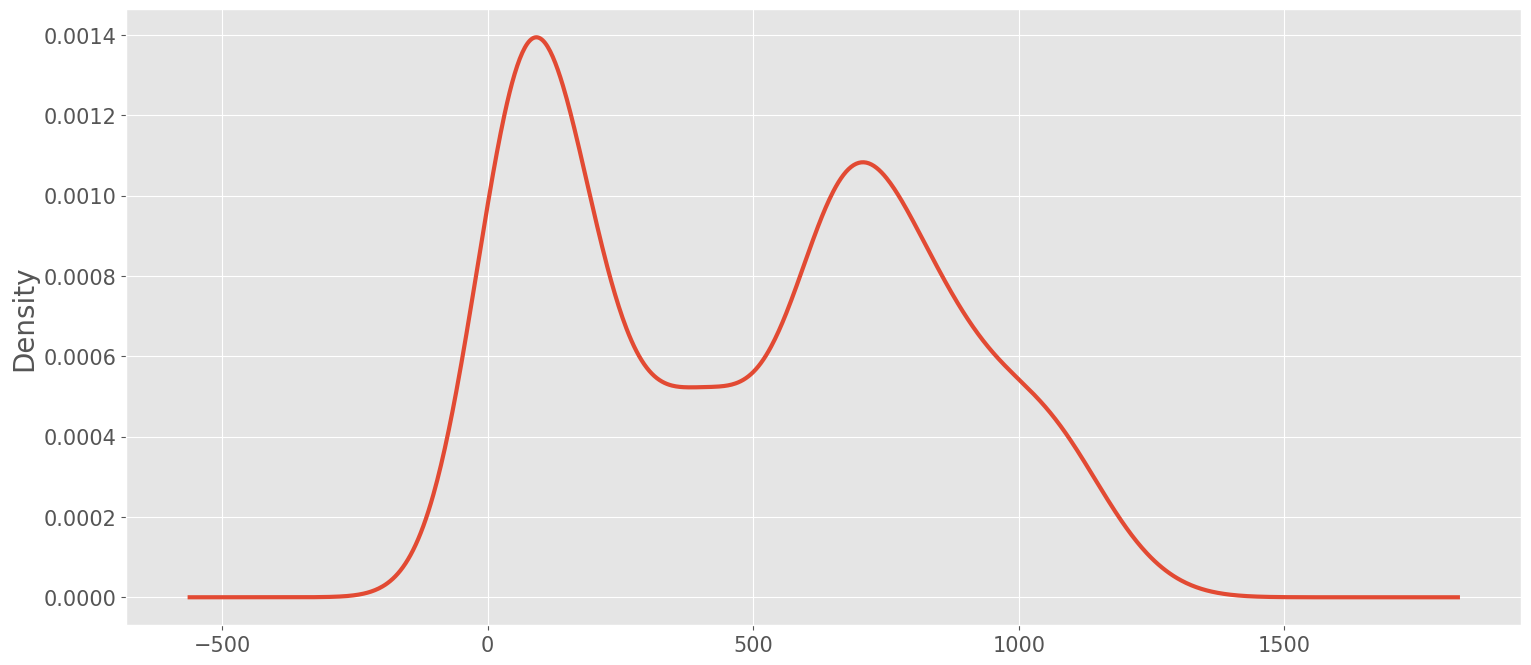

In [19]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [20]:
stock_data["Close"].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [21]:
stock_data["Close"]

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [22]:
stock_data["Close"].rolling(12).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [23]:
rolmean=stock_data["Close"].rolling(365).mean()

In [24]:
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    812.017943
2022-05-17    812.478847
2022-05-18    812.782327
2022-05-19    812.967697
2022-05-20    813.006108
Name: Close, Length: 758, dtype: float64

In [25]:
rolstd=stock_data["Close"].rolling(365).std()

In [26]:
rolstd

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    164.116764
2022-05-17    163.736844
2022-05-18    163.442547
2022-05-19    163.286341
2022-05-20    163.249516
Name: Close, Length: 758, dtype: float64

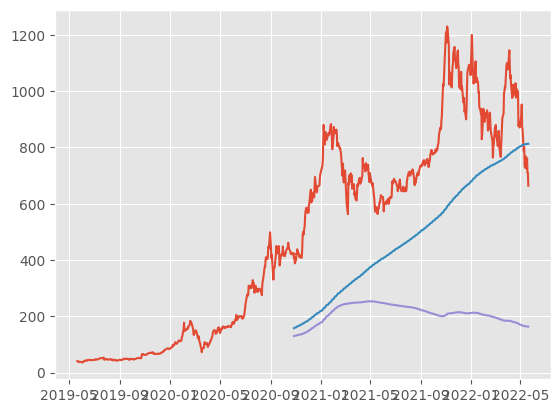

In [27]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [29]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data.Close)

In [30]:
pd.Series(adft[0:4])

0     -1.363009
1      0.599876
2      9.000000
3    748.000000
dtype: float64

In [31]:
pd.Series(adft[0:4], index=['test stats','p value','lag','data points'])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [ ]:
null hypothesis = data is non stationary

p value=0.599876 p<0.05 reject null hypothesis

p>0.05 accept null hypothesis

In [32]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

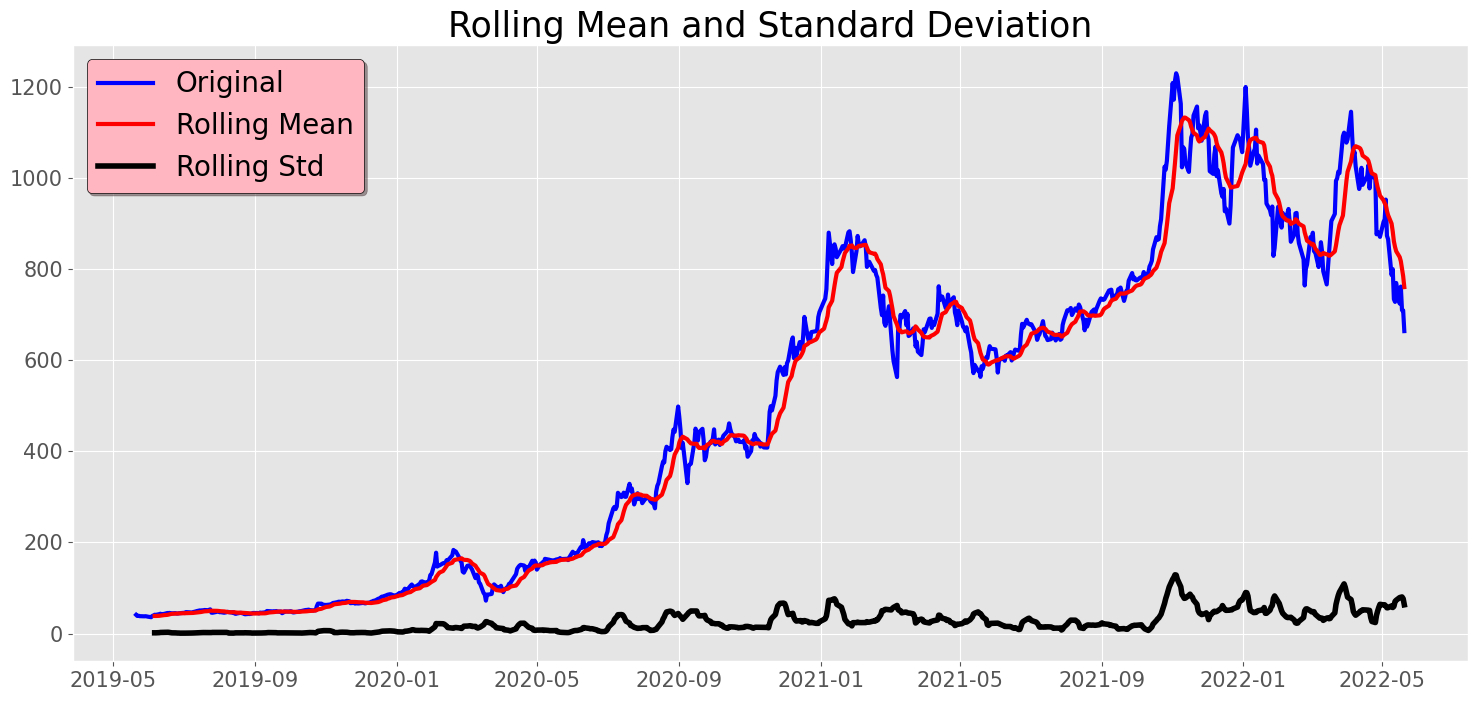

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [33]:
test_stationarity(stock_data)

<Axes: >

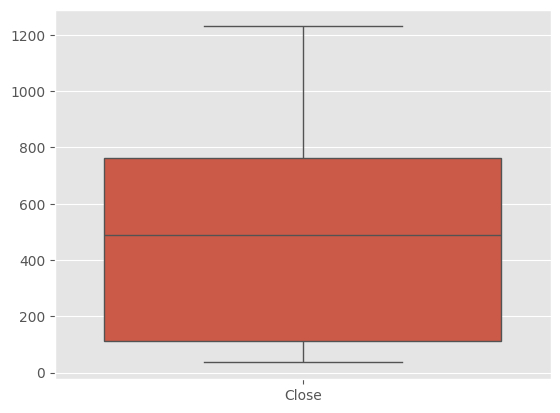

In [34]:
sns.boxplot(stock_data)

In [35]:
# Time serise decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

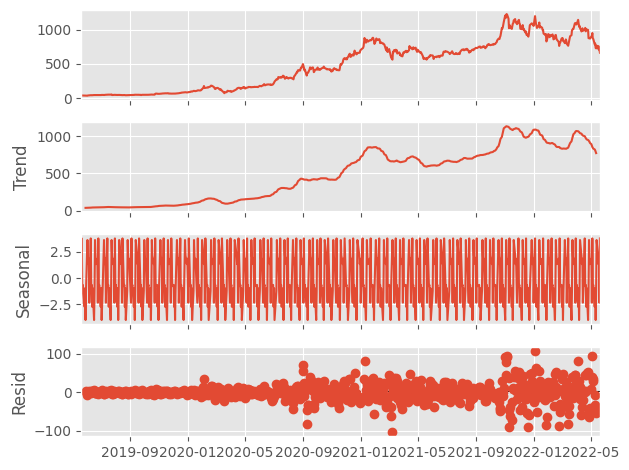

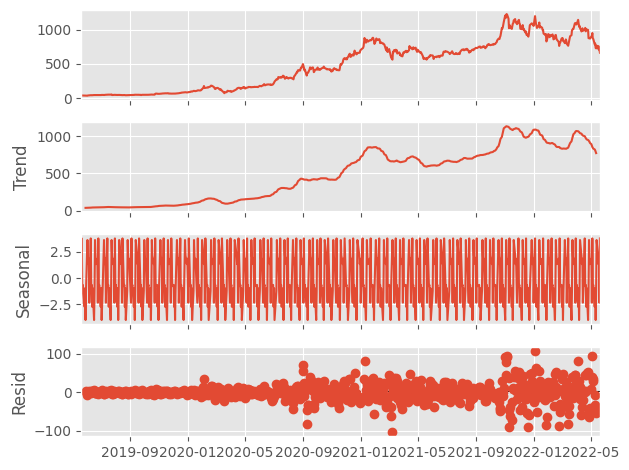

In [36]:
result.plot()

In [37]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

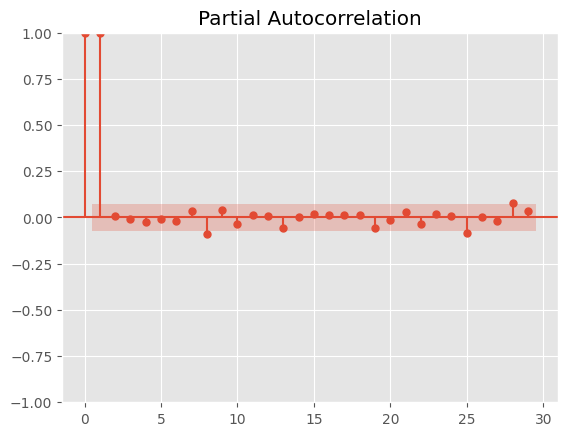

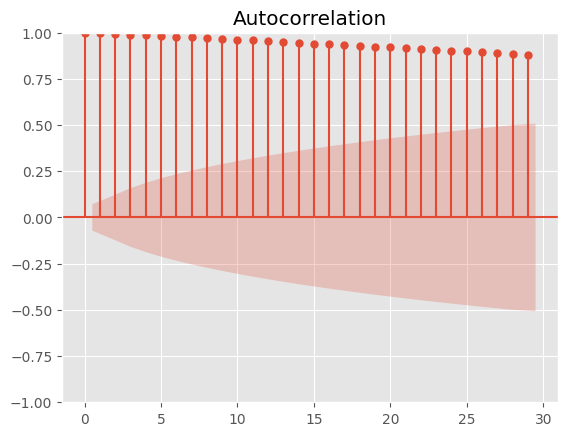

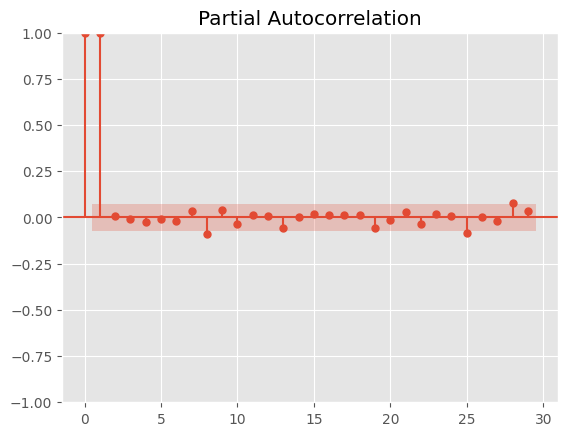

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)


# Preprocessing of the data

In [39]:
df_close=stock_data["Close"]
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [40]:
df_close=df_close.diff()
df_close=df_close.dropna()

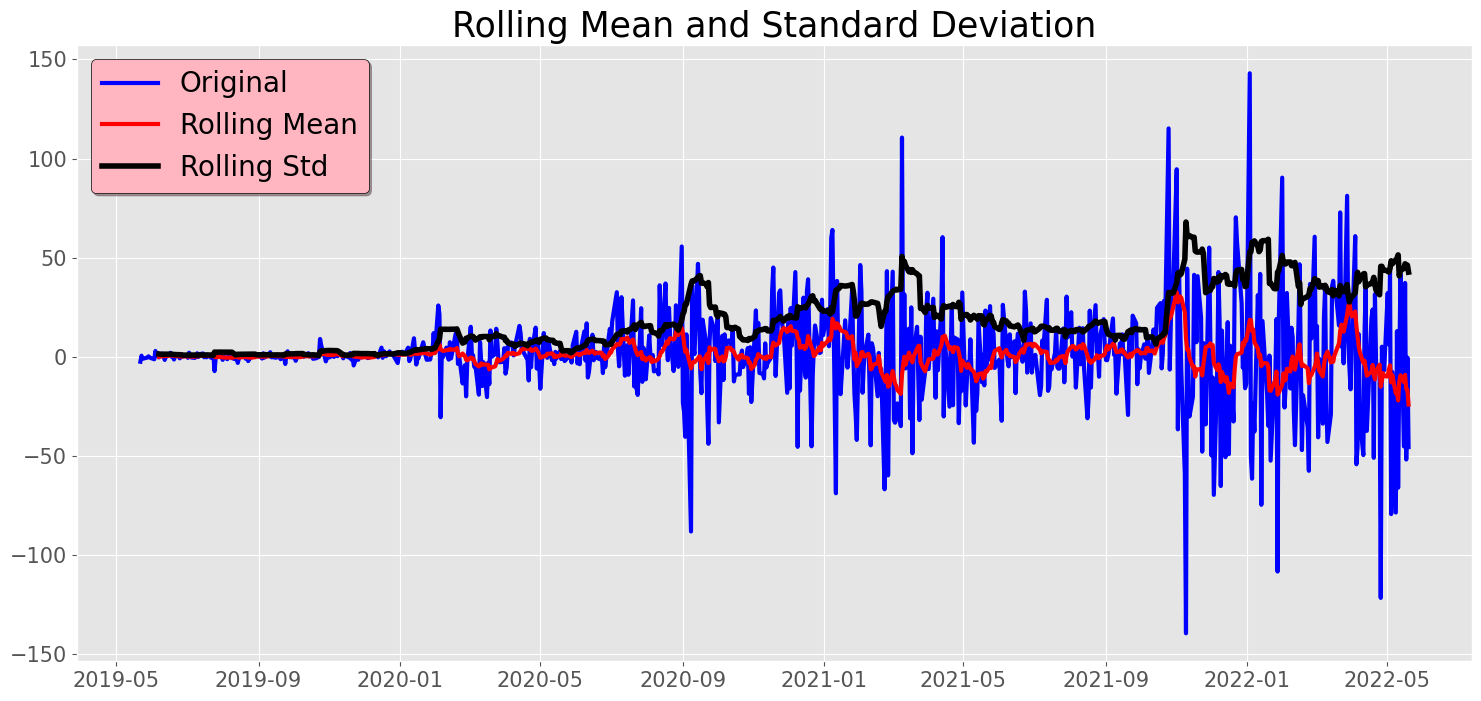

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [41]:
test_stationarity(df_close)

In [ ]:
1
2
3
4
5
6
7

In [ ]:
# [0:-3]
# [-3:]

In [42]:
df_close[0:-60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [43]:
df_close[-60:]

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

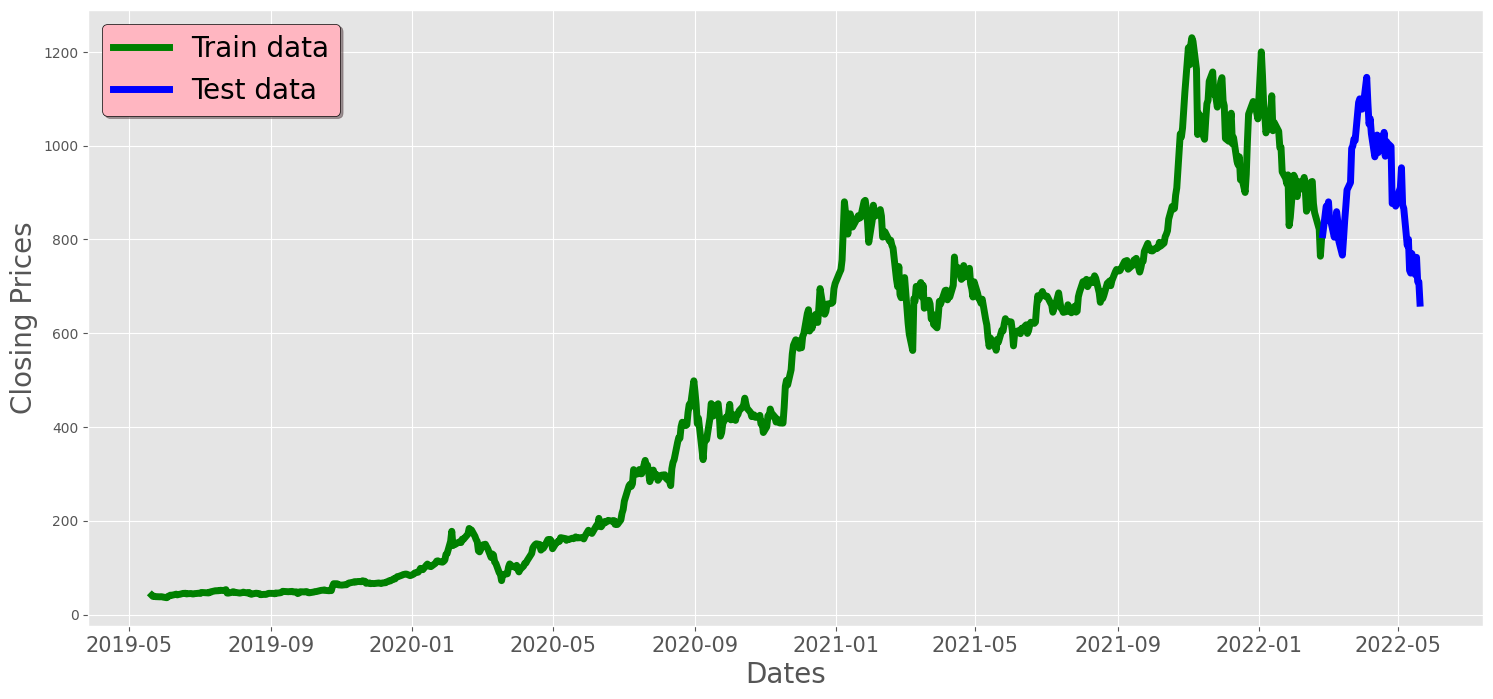

In [44]:
#split data into train and training set
train_data=stock_data['Close'][0:-60]
test_data=stock_data['Close'][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [45]:
stock_data['Close']

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [47]:
history = [x for x in train_data]

In [48]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [49]:
model=ARIMA(history,order=(1,1,1))

In [50]:
model=model.fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Mon, 17 Feb 2025   AIC                           6306.700
Time:                        14:44:30   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model.forecast()

array([800.20438317])

In [53]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\DELL\AppData\Local\Temp\ipykernel_9860\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


93.42405426268355

In [54]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [55]:
float("inf")

inf

In [56]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [57]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data,test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.163
ARIMA(0, 0, 2) RMSE=158.502
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.731
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [58]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
    model=ARIMA(history, order=(2,0,0))
    model=model.fit()
    fc=model.forecast()
    predictions.append(fc)
    history.append(test_data[i])
print(f"my RMSE {np.sqrt(mean_squared_error(test_data, predictions))}")

my RMSE 39.43992712305683


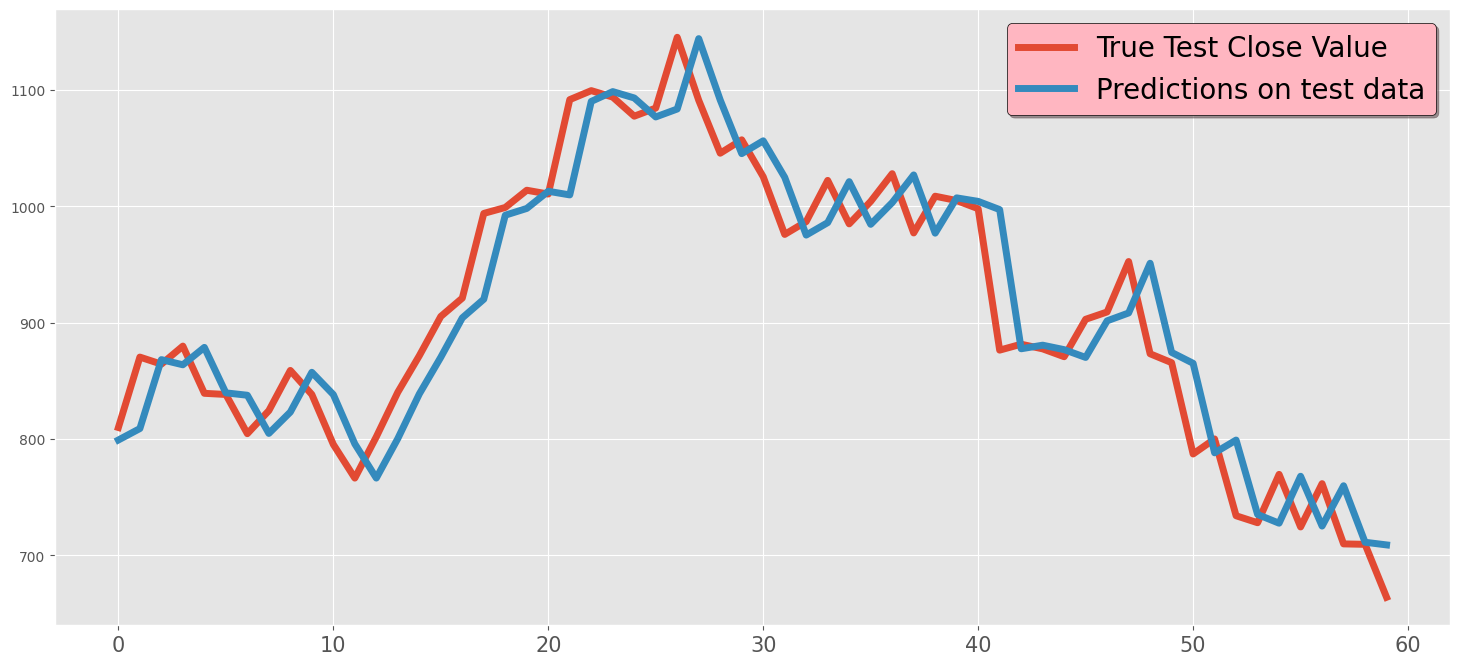

In [59]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [60]:
fc_series = pd.Series(predictions, index=test_data.index)

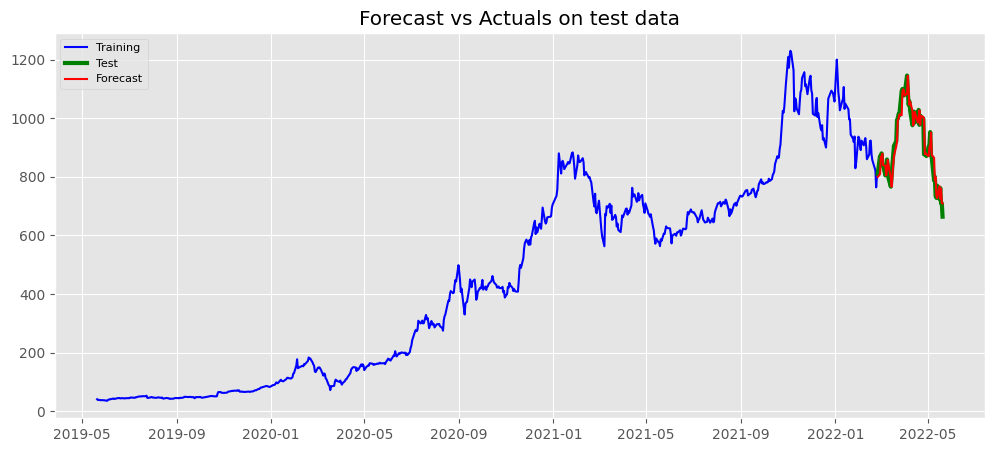

In [61]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

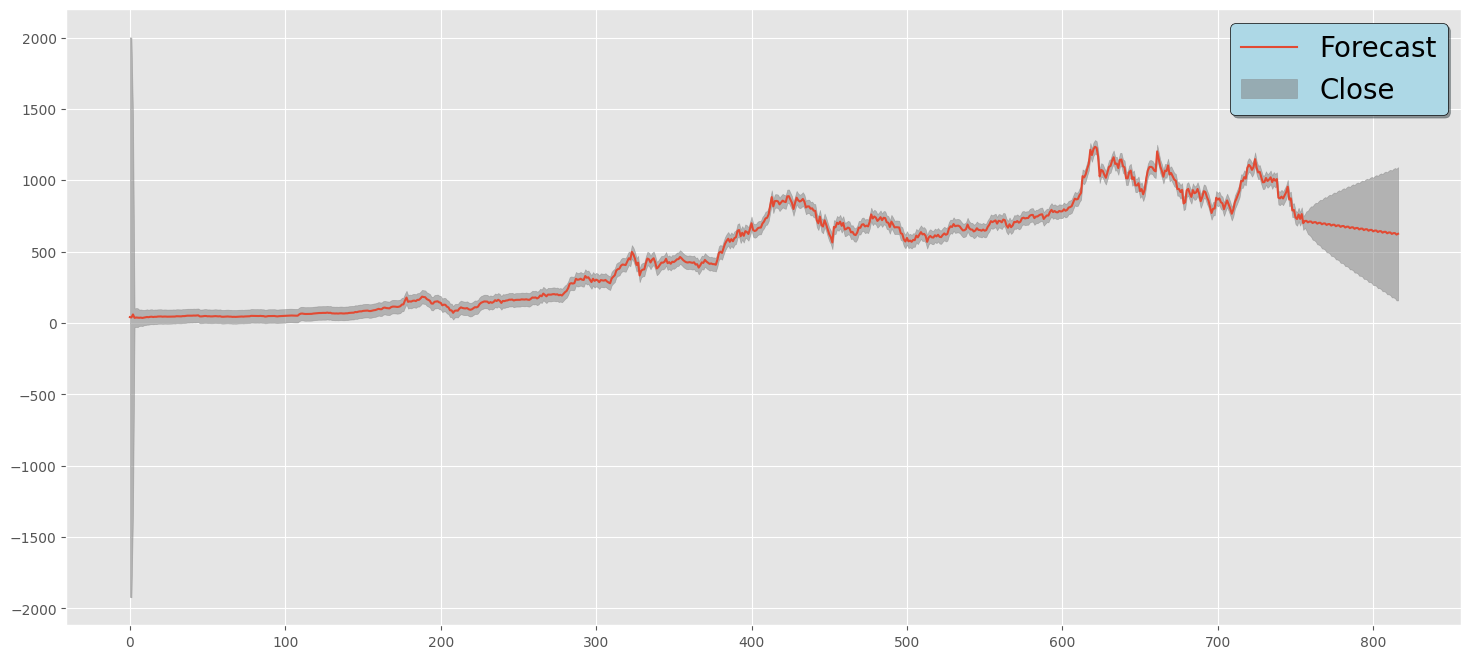

In [66]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [65]:
# Evaluate parameter
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history,order=(0,1,0), seasonal_order=(1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.739481938900674


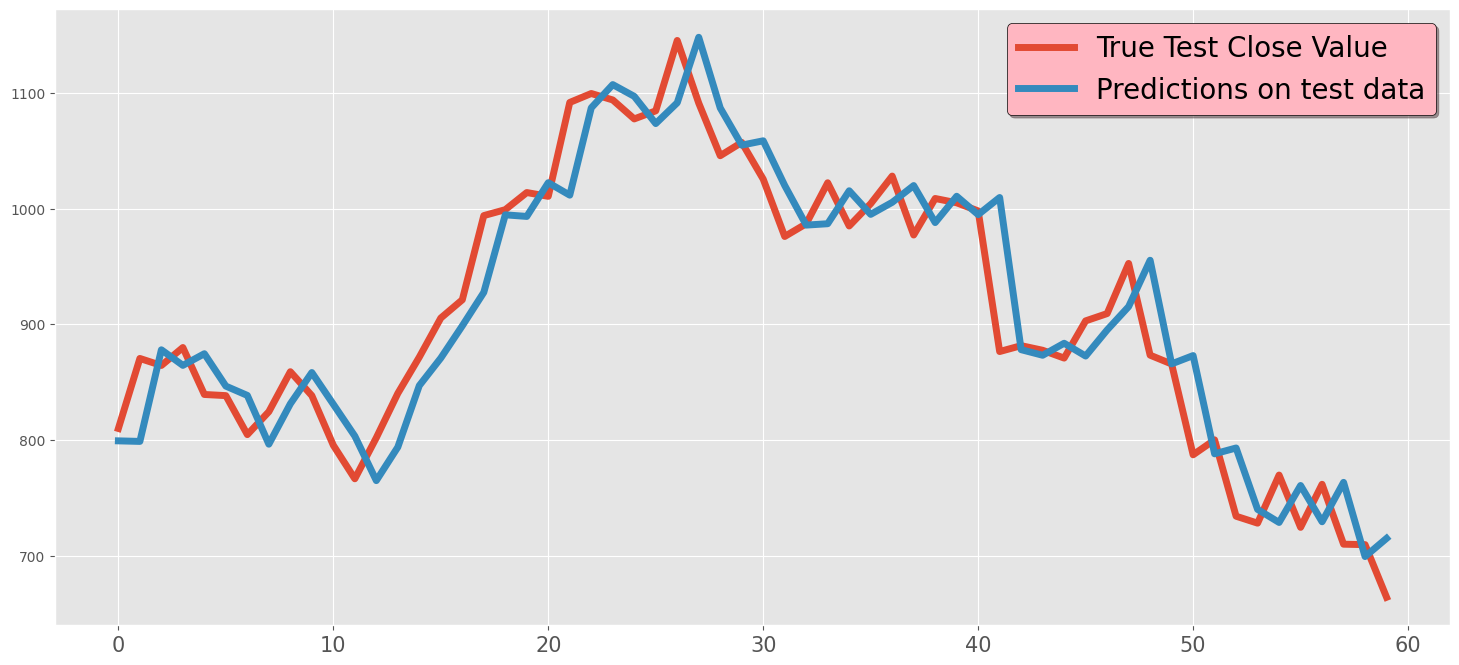

In [67]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()